<a href="https://colab.research.google.com/github/melianti/project/blob/main/Megaline_Sprint4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Megaline  "Surf" vs "Ultimate" , which one more profitable ??**

Megaline Telecommunication company has two type of prepaid packages : "Surf" and "Ultimate". The company advertsiing department want to know which prepaid package give more income, so they can make appropriate advertising budget.

Data analyst do the analysis base on small data sample.
There are 500 Megaline clients data which have information: who they are, from which area they come from, which package used, number of call and message they sent on Year 2018.
Analyst was asked to analyzed client behaviour, then decide which prepaid package more profitable.



In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path1='/content/drive/MyDrive/Dataset/sprint4/megaline_calls.csv'
path2='/content/drive/MyDrive/Dataset/sprint4/megaline_plans.csv'
path3='/content/drive/MyDrive/Dataset/sprint4/megaline_messages.csv'
path4='/content/drive/MyDrive/Dataset/sprint4/megaline_internet.csv'
path5='/content/drive/MyDrive/Dataset/sprint4/megaline_users.csv'

# **Initialization**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind


# **Loading data**

In [5]:
df_calls = pd.read_csv(path1)
df_plans = pd.read_csv(path2)
df_messages = pd.read_csv(path3)
df_internet = pd.read_csv(path4)
df_users = pd.read_csv(path5)

# **Data Preparation**

In [6]:
# Detail data prepaid packages
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In [8]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

In [9]:
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
0,50,15360,500,20,10,0.03,0.03,surf,15.0


In [10]:
df_plans.drop('mb_per_month_included', axis=1, inplace=True)
df_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [11]:
# users data
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,NaN
283,1283,Alan,Burgess,38,"Charleston-North Charleston, SC MSA",2018-06-16,ultimate,NaN
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
229,1229,Augustus,Barker,69,"Austin-Round Rock-Georgetown, TX MSA",2018-12-09,ultimate,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN


In [13]:
# check for any missing data in user data
null_report = df_users.isna().sum().to_frame()
null_report = null_report.rename(columns = {0: 'missing_values'})
null_report['% of total'] = (null_report['missing_values'] / df_users.shape[0]).round(2)
null_report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
churn_date,466,0.93
user_id,0,0.00
first_name,0,0.00
last_name,0,0.00
age,0,0.00
city,0,0.00
reg_date,0,0.00
plan,0,0.00


In [14]:
not_null_report = df_users.loc[df_users['churn_date'].notnull()]
print(not_null_report.count())

user_id       34
first_name    34
last_name     34
age           34
city          34
reg_date      34
plan          34
churn_date    34
dtype: int64


In [15]:
# check any duplicate user data
df_users.duplicated().sum()


0

In [16]:
display(df_users.dtypes)
df_users['reg_date']= pd.to_datetime(df_users['reg_date'])
display(df_users.dtypes)

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object

In [17]:
# Clean data city di table users then put in seperate column "clean_city"
df_users['clean_city'] = df_users['city'].str.split(',').str[1]
df_users['clean_city'] = df_users['clean_city'].str.replace(' MSA', ' ')


In [18]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
98,1098,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,NaN,NY
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN,NY-NJ-PA
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-07,surf,NaN,CA
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN,NY-NJ-PA
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,NY-NJ-PA


In [19]:
# add column to mark is_nyn to make it easier differentiate area "NY-NJ" vs "others"
df_users['is_nyn'] = df_users['clean_city'].str.contains('NY-NJ', regex=True)
df_users['is_nyn'] = df_users['is_nyn'].replace(True, 1).replace(False, 0)
df_users.loc[df_users['is_nyn']== 0, 'clean_city'] = 'Others'
df_users.loc[df_users['is_nyn']== 1, 'clean_city'] = 'NY-NJ'

In [20]:
df_users.tail(8)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_nyn
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,Others,0
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,Others,0
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,NY-NJ,1
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,Others,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,Others,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ,1
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,Others,0


In [21]:
# call data
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
df_calls.sample(5)

,id,user_id,call_date,duration
100136,1358_622,1358,2018-07-20,15.58
57187,1203_578,1203,2018-10-08,15.65
128030,1460_14,1460,2018-08-15,3.55
122629,1433_200,1433,2018-12-02,5.97
115189,1403_263,1403,2018-05-20,8.53


In [23]:
# check if any duplicate data in calldata
df_calls.duplicated().sum()

0

In [24]:
zero_duration = df_calls[df_calls['duration'] == 0]
zero_duration.count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [25]:
# change data type "call date" to datetime, duration to integer
display(df_calls.dtypes)
df_calls['call_date']= pd.to_datetime(df_calls['call_date'])
display(df_calls.dtypes)

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [26]:
# drop row dengan duration = 0
df_calls.info()
zeroduration = df_calls[ (df_calls['duration'] == 0) ].index

df_calls.drop(zeroduration , inplace=True)
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [27]:
# add column "month" and
df_calls['month'] = df_calls['call_date'].dt.to_period("M")
df_calls.sample(5)

,id,user_id,call_date,duration,month
44738,1161_265,1161,2018-12-17,10.12,2018-12
119963,1417_740,1417,2018-08-28,11.74,2018-08
59141,1214_210,1214,2018-10-18,7.34,2018-10
7508,1036_100,1036,2018-07-12,6.22,2018-07
102865,1365_61,1365,2018-10-16,6.27,2018-10


In [28]:
# messages data
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
df_messages.sample(5)

,id,user_id,message_date
16097,1107_259,1107,2018-11-17
27905,1172_362,1172,2018-08-24
11083,1077_354,1077,2018-01-28
65957,1430_386,1430,2018-12-18
42385,1276_50,1276,2018-11-18


In [30]:
# check if any duplicate message data
df_messages.duplicated().sum()

0

In [31]:
# change data type "message date" to datetime
display(df_messages.dtypes)
df_messages['message_date']= pd.to_datetime(df_messages['message_date'])
display(df_messages.dtypes)

id              object
user_id          int64
message_date    object
dtype: object

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [32]:
# add column ;month'
df_messages['month'] = df_messages['message_date'].dt.to_period("M")
df_messages.sample(5)

,id,user_id,message_date,month
47993,1324_721,1324,2018-04-17,2018-04
42962,1281_244,1281,2018-10-13,2018-10
64071,1408_196,1408,2018-03-12,2018-03
19639,1126_402,1126,2018-07-05,2018-07
41329,1264_541,1264,2018-10-15,2018-10


In [33]:
# data internet usage
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
df_internet.sample(5)

,id,user_id,session_date,mb_used
85247,1397_615,1397,2018-07-24,607.37
88225,1406_542,1406,2018-12-30,0.00
72599,1337_83,1337,2018-12-01,295.34
55479,1251_290,1251,2018-09-24,159.03
104386,1498_460,1498,2018-04-13,330.93


In [35]:
df_internet.duplicated().sum()


0

In [36]:
# change data type session_date to datetime
display(df_internet.dtypes)
df_internet['session_date']= pd.to_datetime(df_internet['session_date'])
display(df_internet.dtypes)

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [37]:
# add column ;month'
df_internet['month'] = df_internet['session_date'].dt.to_period("M")
df_internet.sample(5)

,id,user_id,session_date,mb_used,month
99147,1467_284,1467,2018-09-11,169.92,2018-09
55656,1252_24,1252,2018-08-23,90.25,2018-08
87971,1406_288,1406,2018-03-30,6.25,2018-03
20867,1097_105,1097,2018-11-26,345.99,2018-11
38785,1174_48,1174,2018-07-23,132.58,2018-07


# Prepaid packages detail

In [38]:
df_surf= df_plans.loc[df_plans['plan_name'] == 'surf']
print('Plan:', df_surf['plan_name'])
print('plan monthly fee:', df_surf['usd_monthly_pay'])
print('Plan package:', 'call:',df_surf['minutes_included'], 'messages', df_surf['messages_included'])
print('Internet included:', df_surf['gb_per_month_included'])
print('Over Limit charges:', 'call per menit:', df_surf['usd_per_minute'], df_surf['usd_per_message'], df_surf['usd_per_gb'])
print('')

Plan: 0    surf
Name: plan_name, dtype: object
plan monthly fee: 0    20
Name: usd_monthly_pay, dtype: int64
Plan package: call: 0    500
Name: minutes_included, dtype: int64 messages 0    50
Name: messages_included, dtype: int64
Internet included: 0    15.0
Name: gb_per_month_included, dtype: float64
Over Limit charges: call per menit: 0    0.03
Name: usd_per_minute, dtype: float64 0    0.03
Name: usd_per_message, dtype: float64 0    10
Name: usd_per_gb, dtype: int64



In [39]:
df_ultimate= df_plans.loc[df_plans['plan_name'] == 'ultimate']
print('Plan:', df_ultimate['plan_name'])
print('plan monthly fee:', df_ultimate['usd_monthly_pay'])
print('Plan package:', 'call:',df_ultimate['minutes_included'], 'messages', df_ultimate['messages_included'])
print('Internet included:', df_ultimate['gb_per_month_included'])
print('Over Limit charrges:', 'call per menit:', df_ultimate['usd_per_minute'], df_ultimate['usd_per_message'], df_ultimate['usd_per_gb'])
print('')

Plan: 1    ultimate
Name: plan_name, dtype: object
plan monthly fee: 1    70
Name: usd_monthly_pay, dtype: int64
Plan package: call: 1    3000
Name: minutes_included, dtype: int64 messages 1    1000
Name: messages_included, dtype: int64
Internet included: 1    30.0
Name: gb_per_month_included, dtype: float64
Over Limit charrges: call per menit: 1    0.01
Name: usd_per_minute, dtype: float64 1    0.01
Name: usd_per_message, dtype: float64 1    7
Name: usd_per_gb, dtype: int64



There are two plan data frame : "surf" and "ultimate" .
Plan detail #

*   Call limit
*   Internet udage limit
*   message/sms limit
*   Overlimit charges for call, internet, messages

Additional column gb_per_month_included needed as existing internet usage in mb, while the internet usage limit in gb.

the existing column mb(mb_per_month_included) not needed any more.

# *Data corection & enrichment

In [40]:
# Round up call duration into minutes and change data type to integer
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int16')
df_calls.sample(5)

,id,user_id,call_date,duration,month
88951,1324_1012,1324,2018-11-20,12,2018-11
72461,1257_201,1257,2018-06-21,1,2018-06
120912,1422_101,1422,2018-11-21,21,2018-11
107470,1381_207,1381,2018-12-31,8,2018-12
21285,1078_28,1078,2018-11-05,5,2018-11


In [41]:
# Calculate number of calls per users per month
# Call per User/Month
df_calls_month = pd.pivot_table(df_calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
df_calls_month.sample(5)

,user_id,month,duration
424,1090,2018-09,410
1997,1438,2018-09,76
1149,1251,2018-06,487
1165,1253,2018-11,130
1012,1217,2018-12,577


In [42]:
df_calls_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2256 non-null   int64    
 1   month     2256 non-null   period[M]
 2   duration  2256 non-null   int16    
dtypes: int16(1), int64(1), period[M](1)
memory usage: 39.8 KB


In [43]:
# calc number of sms user sent each month
df_messages_month = pd.pivot_table(df_messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  1806 non-null   int64    
 1   month    1806 non-null   period[M]
 2   id       1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB


In [44]:
df_messages_month.sample(5)

,user_id,month,id
1580,1433,2018-11,123
1045,1273,2018-11,55
1624,1444,2018-11,49
1023,1264,2018-12,75
1501,1405,2018-09,61


In [45]:
# calc messages use by each users per month
df_messages_month = pd.pivot_table(df_messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_month.columns = ['user_id', 'month', 'sms']

df_messages_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  1806 non-null   int64    
 1   month    1806 non-null   period[M]
 2   sms      1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB


In [46]:
df_messages_month.sample(5)

,user_id,month,sms
1221,1331,2018-09,99
1603,1439,2018-08,70
1257,1339,2018-05,59
671,1181,2018-09,30
1361,1363,2018-11,34


In [47]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


In [48]:
df_internet_month = pd.pivot_table(df_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_month.sample(5)
df_internet_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  2277 non-null   int64    
 1   month    2277 non-null   period[M]
 2   mb_used  2277 non-null   float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 53.5 KB


In [49]:
df_internet_month.sample(5)

,user_id,month,mb_used
1203,1255,2018-11,7635.97
2036,1439,2018-09,12222.24
2197,1482,2018-11,20245.80
2238,1492,2018-10,11826.22
1378,1298,2018-12,17882.76


In [50]:
# Convert mb_used ke gb_used jika ada kelbihan dibulatkan ke atas
df_internet_month['gb_used'] = np.ceil(df_internet_month['mb_used'] / 1024)
df_internet_month.drop('mb_used', axis=1, inplace=True)
df_internet_month.sample(8)


,user_id,month,gb_used
1581,1343,2018-11,17.0
2101,1456,2018-12,13.0
905,1188,2018-11,24.0
2090,1454,2018-10,23.0
1830,1396,2018-08,13.0
1949,1417,2018-07,26.0
0,1000,2018-12,2.0
1892,1406,2018-03,2.0


# Agregate data per user

Combine all message, internet, call into one data frame. Use user_id, month as key. There are 2293 rows . There are few columns missing : duration, gb_used, messages. That can be understand as user only use one of the facility at that month, not use all the facilities. It need to be corrected

In [51]:
# combine data call, messages, SMS, and internet based on user_id and  month
df_main = df_calls_month.merge(df_internet_month, how='outer', on=['user_id', 'month'])
df_main = df_main.merge(df_messages_month, how='outer', on=['user_id', 'month'])
df_main.head(10)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2293 non-null   int64    
 1   month     2293 non-null   period[M]
 2   duration  2256 non-null   float64  
 3   gb_used   2277 non-null   float64  
 4   sms       1806 non-null   float64  
dtypes: float64(3), int64(1), period[M](1)
memory usage: 89.7 KB


In [52]:
# check null value in df_main
df_main.isnull().sum()

user_id       0
month         0
duration     37
gb_used      16
sms         487
dtype: int64

In [53]:
# select all rows while duration null and repalce null with zeroes
print(df_main['duration'].isnull().sum())
df_main['duration']= df_main['duration'].fillna(0)
df_main.isnull().sum()

37


user_id       0
month         0
duration      0
gb_used      16
sms         487
dtype: int64

In [54]:
## select all rows while gb_used null and repalce null with zeroes
print(df_main[df_main['gb_used'].isnull()])
df_main.isnull().sum()
df_main['gb_used']= df_main['gb_used'].fillna(0)
df_main.isnull().sum()

      user_id    month  duration  gb_used    sms
174      1044  2018-08      13.0      NaN    NaN
1026     1222  2018-06      14.0      NaN    2.0
1542     1340  2018-08      46.0      NaN    8.0
1544     1340  2018-10     441.0      NaN   62.0
1792     1393  2018-10      71.0      NaN    4.0
2127     1470  2018-05     240.0      NaN   51.0
2128     1470  2018-06     565.0      NaN  133.0
2129     1470  2018-07     524.0      NaN  147.0
2130     1470  2018-08     580.0      NaN  141.0
2131     1470  2018-09     471.0      NaN  130.0
2132     1470  2018-10     459.0      NaN  145.0
2133     1470  2018-11     632.0      NaN  156.0
2134     1470  2018-12     592.0      NaN  153.0
2184     1484  2018-11      38.0      NaN    1.0
2207     1491  2018-04      44.0      NaN    6.0
2292     1482  2018-10       0.0      NaN    2.0


user_id       0
month         0
duration      0
gb_used       0
sms         487
dtype: int64

In [55]:
## select semua rows ketika sms null and repalce null dengan zeroes

df_main.isnull().sum()
df_main['sms']= df_main['sms'].fillna(0)
df_main.isnull().sum()
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2293 non-null   int64    
 1   month     2293 non-null   period[M]
 2   duration  2293 non-null   float64  
 3   gb_used   2293 non-null   float64  
 4   sms       2293 non-null   float64  
dtypes: float64(3), int64(1), period[M](1)
memory usage: 89.7 KB


Now dataframe combine call, internet, messages all rows become 2293 rows time to combine data plan and data users.

In [56]:
# combine data user and data plan
df_users_plan = df_users.merge(df_plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
df_users_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   first_name             500 non-null    object        
 2   last_name              500 non-null    object        
 3   age                    500 non-null    int64         
 4   city                   500 non-null    object        
 5   reg_date               500 non-null    datetime64[ns]
 6   plan                   500 non-null    object        
 7   churn_date             34 non-null     object        
 8   clean_city             500 non-null    object        
 9   is_nyn                 500 non-null    int64         
 10  messages_included      500 non-null    int64         
 11  minutes_included       500 non-null    int64         
 12  usd_monthly_pay        500 non-null    int64         
 13  usd_p

In [57]:
# Cleaning table user_plan drop all columns which not needed
#df_users_plan.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1, inplace=True)
df_users_plan.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date' ], axis=1, inplace=True)
df_users_plan.info()
df_users_plan.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   plan                   500 non-null    object 
 2   clean_city             500 non-null    object 
 3   is_nyn                 500 non-null    int64  
 4   messages_included      500 non-null    int64  
 5   minutes_included       500 non-null    int64  
 6   usd_monthly_pay        500 non-null    int64  
 7   usd_per_gb             500 non-null    int64  
 8   usd_per_message        500 non-null    float64
 9   usd_per_minute         500 non-null    float64
 10  gb_per_month_included  500 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 43.1+ KB


,user_id,plan,clean_city,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
91,1091,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0
267,1267,surf,Others,0,50,500,20,10,0.03,0.03,15.0
226,1226,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0
101,1101,surf,Others,0,50,500,20,10,0.03,0.03,15.0
359,1359,surf,Others,0,50,500,20,10,0.03,0.03,15.0


In [58]:
# combine all table become df_main_full
df_main_full = df_main.merge(df_users_plan, how='left', on='user_id')
df_main_full.info()
df_main_full.sample(6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   int64    
 1   month                  2293 non-null   period[M]
 2   duration               2293 non-null   float64  
 3   gb_used                2293 non-null   float64  
 4   sms                    2293 non-null   float64  
 5   plan                   2293 non-null   object   
 6   clean_city             2293 non-null   object   
 7   is_nyn                 2293 non-null   int64    
 8   messages_included      2293 non-null   int64    
 9   minutes_included       2293 non-null   int64    
 10  usd_monthly_pay        2293 non-null   int64    
 11  usd_per_gb             2293 non-null   int64    
 12  usd_per_message        2293 non-null   float64  
 13  usd_per_minute         2293 non-null   float64  
 14  gb_per_month_included  2

,user_id,month,duration,gb_used,sms,plan,clean_city,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
1568,1346,2018-12,345.0,19.0,66.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0
2180,1483,2018-08,424.0,11.0,6.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0
489,1106,2018-05,174.0,13.0,0.0,surf,NY-NJ,1,50,500,20,10,0.03,0.03,15.0
1134,1247,2018-12,496.0,26.0,112.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0
1321,1291,2018-08,472.0,21.0,11.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0
1964,1429,2018-12,130.0,7.0,17.0,surf,NY-NJ,1,50,500,20,10,0.03,0.03,15.0


In [59]:
#check number of rows
df_main_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   int64    
 1   month                  2293 non-null   period[M]
 2   duration               2293 non-null   float64  
 3   gb_used                2293 non-null   float64  
 4   sms                    2293 non-null   float64  
 5   plan                   2293 non-null   object   
 6   clean_city             2293 non-null   object   
 7   is_nyn                 2293 non-null   int64    
 8   messages_included      2293 non-null   int64    
 9   minutes_included       2293 non-null   int64    
 10  usd_monthly_pay        2293 non-null   int64    
 11  usd_per_gb             2293 non-null   int64    
 12  usd_per_message        2293 non-null   float64  
 13  usd_per_minute         2293 non-null   float64  
 14  gb_per_month_included  2

All data has already combine in one dataframe df_main_full total 2293 rows

Calculate income per user per month. save in column call_charge, internet_charge, message_charge. and the total put in total_charge.

In [60]:
# fuction to calculate monthly income per user
def chargeable_calls(row):
    plan = row['plan']
    minutes_used = row['duration']
    if plan == 'surf':
        if minutes_used > 500:
            chargeable = (minutes_used - 500) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable
def chargeable_messages(row):
    plan = row['plan']
    number_of_texts = row['sms']
    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = (number_of_texts - 50) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = (number_of_texts - 1000) * 0.01
        else:
            chargeable = 0
    return chargeable
def chargeable_data(row):
    plan = row['plan']
    data_rounded_up = row['gb_used']
    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = (data_rounded_up - 15) * 10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = (data_rounded_up - 30) * 7
        else:
            chargeable = 0
    return chargeable


In [61]:
df_main_full['call_charge'] = df_main_full.apply(chargeable_calls, axis=1)
df_main_full['message_charge'] = df_main_full.apply(chargeable_messages, axis=1)
df_main_full['internet_charge'] = df_main_full.apply(chargeable_data, axis=1)


In [62]:
df_main_full.sample(5)

,user_id,month,duration,gb_used,sms,plan,clean_city,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge
813,1174,2018-05,178.0,5.0,16.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0
1207,1261,2018-02,56.0,7.0,11.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0
1179,1256,2018-11,604.0,21.0,27.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,3.12,0.0,60.0
541,1117,2018-07,446.0,18.0,0.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,30.0
270,1061,2018-08,595.0,18.0,71.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0


In [63]:
# calculate total charge/income per user per bulan


df_main_full['total_charge'] = df_main_full['call_charge'] + df_main_full['internet_charge'] + df_main_full['message_charge'] + df_main_full['usd_monthly_pay']
df_main_full.sample(6)

,user_id,month,duration,gb_used,sms,plan,clean_city,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,total_charge
790,1170,2018-10,895.0,24.0,5.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,11.85,0.0,90.0,121.85
254,1059,2018-06,750.0,11.0,64.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
170,1043,2018-09,200.0,32.0,101.0,ultimate,NY-NJ,1,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,14.0,84.00
2105,1466,2018-06,206.0,13.0,29.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00
131,1036,2018-11,517.0,10.0,76.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
1447,1322,2018-10,94.0,11.0,0.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00


Data has already aggregate and total_income already calculated per user per month.

Next we check point below:
*   user behaviour for "call", "internet", "messages". for each package
*   User behaviour impact to "megaline" total income



### **CALL**

In [64]:
# compare average call duration per user per month in each package create histogram.

avg_duration = pd.pivot_table(df_main_full, index=['month'], columns='plan', values='duration', aggfunc='mean').reset_index()
avg_duration

plan,month,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


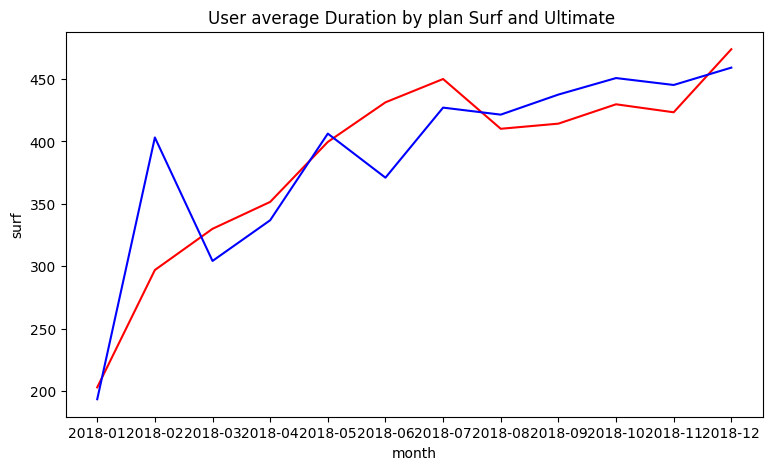

In [65]:
# linechart avg_duration monthly by plan
avg_duration['month'] = avg_duration['month'].astype(str)
plt.figure(figsize=(9, 5))
plt.title('User average Duration by plan Surf and Ultimate ')

sns.lineplot(data=avg_duration, x='month', y='surf', color='red')
sns.lineplot(data=avg_duration, x='month', y='ultimate', color='blue')
plt.show()

In [66]:
avg_duration.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,384.469691,387.999742
std,76.535567,77.266064
min,203.000000,193.500000
25%,346.155000,362.432371
50%,412.168958,413.839000
75%,430.122211,439.432934
max,473.836478,459.099338


In [67]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
# varians dan standard deviasi
# surf
surf_duration_std = round(avg_duration['surf'].std(), 1)
surf_duration_var = round(avg_duration['surf'].var(), 1)
print('Surf:')
print(f'Standard Deviasi duration {surf_duration_std}')
print(f'Varians duration  {surf_duration_var}')
print()

# ultimate
ultimate_duration_std = round(avg_duration['ultimate'].std(), 1)
ultimate_duration_var = round(avg_duration['ultimate'].var(), 1)
print('Ultimate:')
print(f'Standard Deviasi duration {ultimate_duration_std}')
print(f'Varians duration {ultimate_duration_var}')

Surf:
Standard Deviasi duration 76.5
Varians duration  5857.7

Ultimate:
Standard Deviasi duration 77.3
Varians duration 5970.0


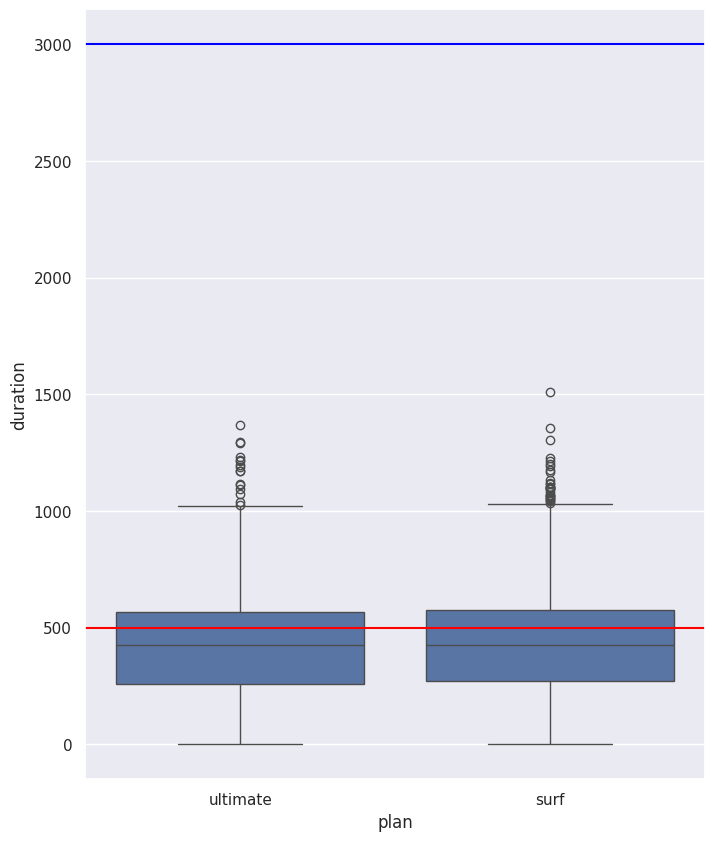

In [68]:
# create boxplot for duration distribution call duration for surf vs ultimate
sns.set_style("whitegrid")

#define figure size
sns.set(rc={"figure.figsize":(8, 10)}) #width=12, height=14

graph = sns.boxplot(x = 'plan', y = 'duration', data = df_main_full)

#Drawing a horizontal line at point 500 & 3000
graph.axhline(500, color='red')
graph.axhline(3000, color='blue')
#The plot is shown
plt.show()

User behaviour for "call" in both prepaid packages.
Median call for surf (412,17) and for ultimate (413,83)
Mean call for surf(384,47) and for ultimate(388)

Number of call for the two packages almost same.

di Boxplot terlihat hal hal menarik:

Users from both packages has similar average call usage . Surf user has average median slightly above the surf call max limit (300), while ultimate max limit is far above(3000) while the ultimate average usage is also around 413.

It means call facilities from ultimate package is not far above what is user need.


## **Messages/SMS**

In [69]:
# compare total messages user sent each month for each package
avg_sms = pd.pivot_table(df_main_full, index=['month'], columns='plan', values='sms', aggfunc='mean').reset_index()
avg_sms

plan,month,surf,ultimate
0,2018-01,10.500000,15.500000
1,2018-02,12.000000,21.571429
2,2018-03,15.260870,20.250000
3,2018-04,17.400000,22.047619
4,2018-05,24.012987,32.103448
5,2018-06,25.298969,29.340426
6,2018-07,27.033058,32.830508
7,2018-08,28.777778,38.478873
8,2018-09,30.762887,37.895349
9,2018-10,33.839662,39.443396


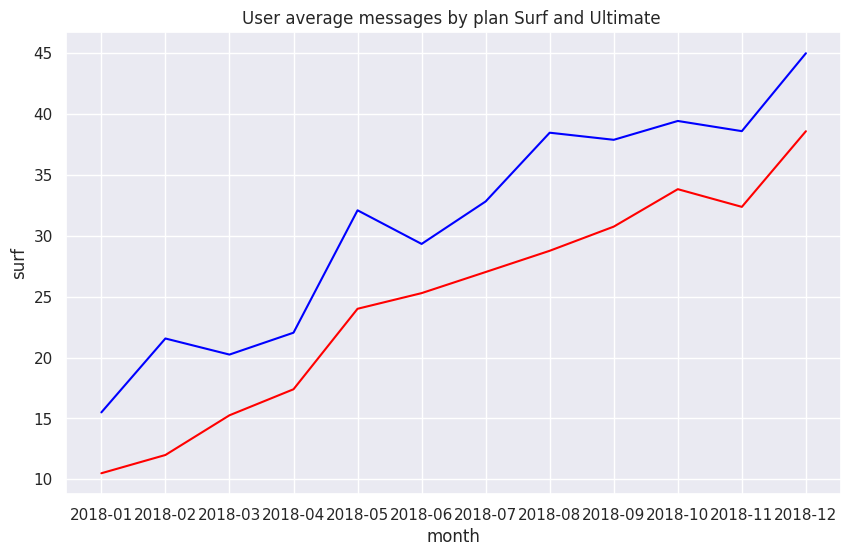

In [70]:
# linechart avg_sms monthly by plan
avg_sms['month'] = avg_sms['month'].astype(str)
plt.figure(figsize=(10,6))
plt.title('User average messages by plan Surf and Ultimate ')

sns.lineplot(data=avg_sms, x='month', y='surf', color='red')
sns.lineplot(data=avg_sms, x='month', y='ultimate', color='blue')
plt.show()

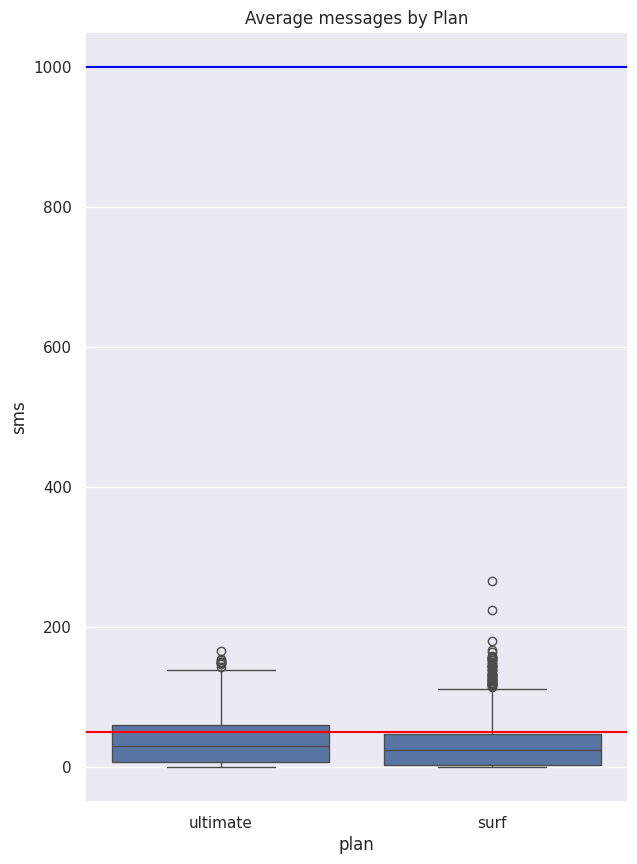

In [71]:
# create boxplot to visualized  messages distribution for surf vs ultimate
sns.set_style("whitegrid")

#define figure size
sns.set(rc={"figure.figsize":(7, 10)}) #width=7, height=10

graph = sns.boxplot(x = 'plan', y = 'sms', data = df_main_full)

#Drawing a horizontal line at point 50 & 1000
graph.axhline(50, color='red')
graph.axhline(1000, color='blue')
#The plot is shown
plt.title('Average messages by Plan')
plt.show()

In [72]:
avg_sms.describe()


plan,surf,ultimate
count,12.000000,12.000000
mean,24.656000,31.089497
std,9.049246,9.346334
min,10.500000,15.500000
25%,16.865217,21.928571
50%,26.166013,32.466978
75%,31.168455,38.510730
max,38.600629,45.006623


User Behaviour messages/SMS

Data statistic and Graphic showed average usage messages/SMS for ultimate package slightly higher than from "surf" package.
Average usage for "surf" : 24,66
Average usage for "ultimate": 32,47

Outlier appears in boxplot both for surf users and Ultimate users.
There are two horozontal lines in boxplot which represent each package usage limit for messages/SMS.
Red line for surf(50 sms) and blue line for ultimate(1000 sms)

*   median for surf and ultimate packages still below the red line which means most of users message usage still below the limit of surf package.
*   while blue line which the limit for ultimate package is far above which mean all users not reach that limit. The ultimate messages limit not fully used.



## **Internet**

In [73]:
# compare internet traffic for ultimate and surf for each month
avg_gb_used = pd.pivot_table(df_main_full, index=['month'], columns='plan', values='gb_used', aggfunc='mean').reset_index()
avg_gb_used

plan,month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


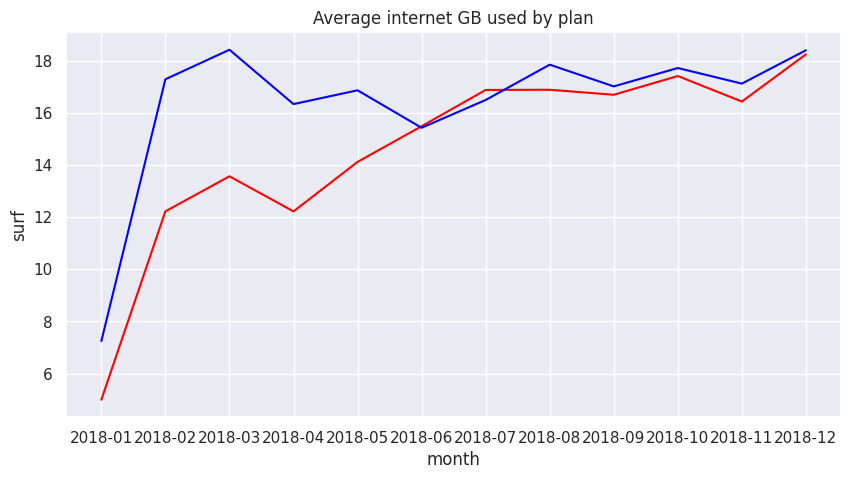

In [74]:
 #linechart avg_internet monthly by plan
avg_gb_used['month'] = avg_gb_used['month'].astype(str)
plt.figure(figsize=(10,5))
plt.title('User average internet by plan Surf and Ultimate ')

sns.lineplot(data=avg_gb_used, x='month', y='surf', color='red')
sns.lineplot(data=avg_gb_used, x='month', y='ultimate', color='blue')
plt.title('Average internet GB used by plan')
plt.show()

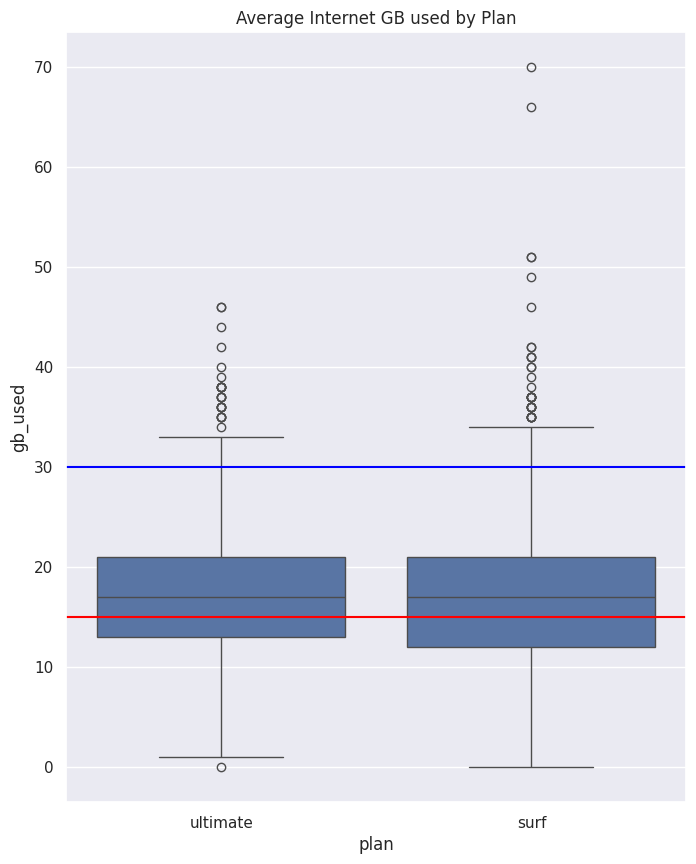

In [75]:
# create boxplot for usage distribution of internet usage (gb_used) package surf vs ultimate
sns.set_style("whitegrid")

#define figure size
sns.set(rc={"figure.figsize":(8, 10)}) #width=8, height=10

graph = sns.boxplot(x = 'plan', y = 'gb_used', data = df_main_full)

#Drawing a horizontal line at point 500 & 3000
graph.axhline(15, color='red')
graph.axhline(30, color='blue')
#The plot is shown
plt.title('Average Internet GB used by Plan')
plt.show()

In [76]:
avg_gb_used.describe()
df_main_full.describe()

,user_id,duration,gb_used,sms,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,total_charge
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,429.283471,16.870475,33.166594,0.164413,348.299171,1284.997819,35.699956,9.058003,0.023720,0.023720,19.709987,1.264828,0.144322,27.242041,64.351147
std,143.051927,236.320077,7.796174,34.070085,0.370731,441.006389,1160.543128,23.210863,1.392652,0.009284,0.009284,6.963259,3.233992,0.493515,48.571724,46.624945
min,1000.000000,0.000000,0.000000,0.000000,0.000000,50.000000,500.000000,20.000000,7.000000,0.010000,0.010000,15.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,265.000000,12.000000,3.000000,0.000000,50.000000,500.000000,20.000000,7.000000,0.010000,0.010000,15.000000,0.000000,0.000000,0.000000,23.480000
50%,1245.000000,425.000000,17.000000,26.000000,0.000000,50.000000,500.000000,20.000000,10.000000,0.030000,0.030000,15.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,572.000000,21.000000,51.000000,0.000000,1000.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.000000,0.000000,0.000000,40.000000,70.000000
max,1499.000000,1510.000000,70.000000,266.000000,1.000000,1000.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.000000,30.300000,6.480000,550.000000,590.370000


Internet usage User behaviour for Surf vs Ultimate

Internet usage for both surf and ultimate is high:
Average internet usage for surf :
 mean internet usage surf (14,59), ultimate(16,35) while median surf(15,96), ultimate(17,06)

Thera are lot of outlier di boxplot especially for surf.

Internet average usage above package limit surf(15 GB) and ultimate(30GB)

# **INCOME**

## Monthly Income per plan

In [77]:
# monthly income per plan .
monthly_per_plan = pd.pivot_table(df_main_full, index='month', columns='plan', values='total_charge', aggfunc='sum').reset_index()
print(monthly_per_plan)


plan    month      surf  ultimate
0     2018-01     40.00     280.0
1     2018-02    309.57     490.0
2     2018-03   1056.65     896.0
3     2018-04   2035.53    1533.0
4     2018-05   3667.37    2051.0
5     2018-06   4779.80    3367.0
6     2018-07   7583.56    4242.0
7     2018-08  10356.85    5173.0
8     2018-09  11304.67    6195.0
9     2018-10  15504.83    7665.0
10    2018-11  16415.21    9107.0
11    2018-12  22437.14   11067.0


In [78]:
df_main_full.sample(8)

,user_id,month,duration,gb_used,sms,plan,clean_city,is_nyn,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,total_charge
998,1214,2018-09,333.0,19.0,15.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
1501,1334,2018-03,134.0,4.0,1.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,0.00,0.0,0.0,20.00
996,1214,2018-07,467.0,17.0,24.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
1297,1283,2018-12,932.0,33.0,117.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,21.0,91.00
1260,1273,2018-11,324.0,14.0,55.0,ultimate,Others,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
114,1031,2018-09,515.0,13.0,3.0,ultimate,NY-NJ,1,1000,3000,70,7,0.01,0.01,30.0,0.00,0.0,0.0,70.00
2196,1488,2018-12,721.0,20.0,0.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,6.63,0.0,50.0,76.63
105,1029,2018-09,763.0,14.0,9.0,surf,Others,0,50,500,20,10,0.03,0.03,15.0,7.89,0.0,0.0,27.89


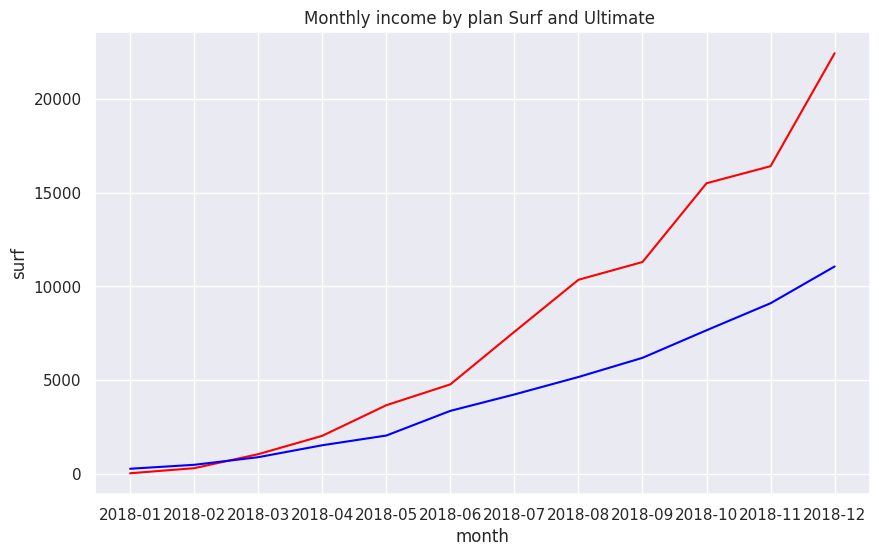

In [79]:
monthly_per_plan['month'] = monthly_per_plan['month'].astype(str)
plt.figure(figsize=(10,6))
plt.title('Monthly income by plan Surf and Ultimate ')

sns.lineplot(data=monthly_per_plan, x='month', y='surf', color='red')
sns.lineplot(data=monthly_per_plan, x='month', y='ultimate', color='blue')
plt.show()

Monthly income per plan from "Surf" is slighly higher than from "ultimate" since mid of year 2018.

It cause by surf internet usage which higher than the plan internet usage limit, while in Ultimate the overlimit of internet usage is not as much as in surf. which make the income flat to its ultimate monthly fee (70).

## User average monthly income per plan

In [80]:
# compare average income per user per month for each plan. create histogram
avg_income = pd.pivot_table(df_main_full, index=['month'], columns='plan', values='total_charge', aggfunc='mean').reset_index()
avg_income

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


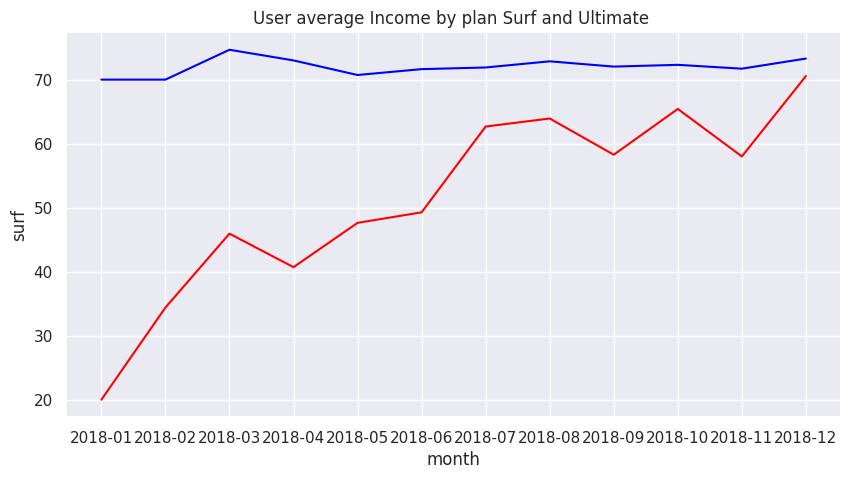

In [81]:
#histogram avg_income monthly by plan
avg_income['month'] = avg_income['month'].astype(str)
plt.figure(figsize=(10,5))
plt.title('User average Income by plan Surf and Ultimate ')

sns.lineplot(data=avg_income, x='month', y='surf', color='red')
sns.lineplot(data=avg_income, x='month', y='ultimate', color='blue')
plt.show()

In [82]:
# Bandingkan  rata-rata total income user setiap paket . Buatlah sebuah diagram batang untuk memvisu
avg_user = pd.pivot_table(df_main_full, index=['user_id'], columns='plan', values='total_charge', aggfunc='mean').reset_index()
avg_user


plan,user_id,surf,ultimate
0,1000,NaN,70.0
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,158.120000,NaN
4,1004,76.250000,NaN
...,...,...,...
485,1495,118.325000,NaN
486,1496,28.000000,NaN
487,1497,NaN,70.0
488,1498,77.272727,NaN


In [83]:
# drop row jika  kolom surf NaN
avg_surf = avg_user.loc[:, ['user_id', 'surf']].dropna()
avg_surf

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,158.120000
4,1004,76.250000
5,1005,40.000000
...,...,...
484,1494,30.625000
485,1495,118.325000
486,1496,28.000000
488,1498,77.272727


<Axes: title={'center': 'Average Monthly Income by User Plan Surf '}, xlabel='surf', ylabel='Count'>

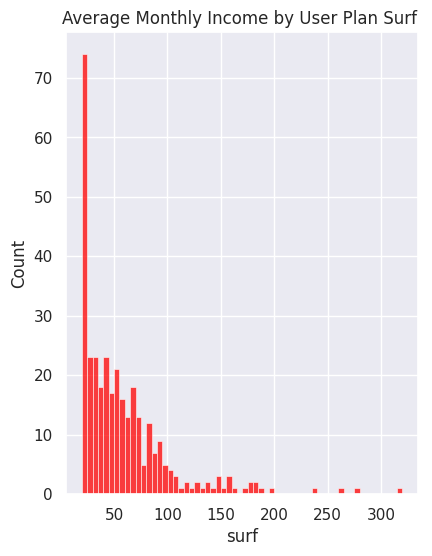

In [84]:
# Histogram untuk Average monthly income by user plan surf
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Average Monthly Income by User Plan Surf ')
sns.histplot(avg_surf['surf'], binwidth=5, color='red')

In [85]:
# Drop row jika ultimate = NaN
avg_ultimate = avg_user.loc[:, ['user_id', 'ultimate']].dropna()
avg_ultimate

plan,user_id,ultimate
0,1000,70.000000
6,1006,77.000000
8,1008,70.000000
11,1011,70.000000
13,1013,70.000000
...,...,...
472,1482,70.000000
477,1487,70.000000
480,1490,114.333333
483,1493,70.000000


<Axes: title={'center': 'Average Monthly Income by User Plan Ultimate '}, xlabel='ultimate', ylabel='Count'>

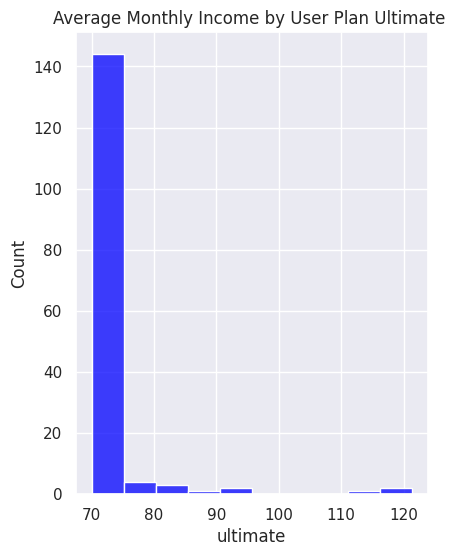

In [86]:
# Histogram average monthly income by user plan
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Average Monthly Income by User Plan Ultimate ')
sns.histplot(avg_ultimate['ultimate'], binwidth=5, color='blue')

In [87]:
# varians dan standard deviasi
# surf
surf_std = round(avg_surf['surf'].std(), 1)
surf_var = round(avg_surf['surf'].var(), 1)
print('Surf:')
print(f'Standard Deviasi {surf_std}')
print(f'Varians {surf_var}')
print()

# ultimate
ultimate_std = round(avg_ultimate['ultimate'].std(), 1)
ultimate_var = round(avg_ultimate['ultimate'].var(), 1)
print('Ultimate:')
print(f'Standard Deviasi {ultimate_std}')
print(f'Varians {ultimate_var}')

Surf:
Standard Deviasi 43.6
Varians 1897.9

Ultimate:
Standard Deviasi 7.4
Varians 55.1


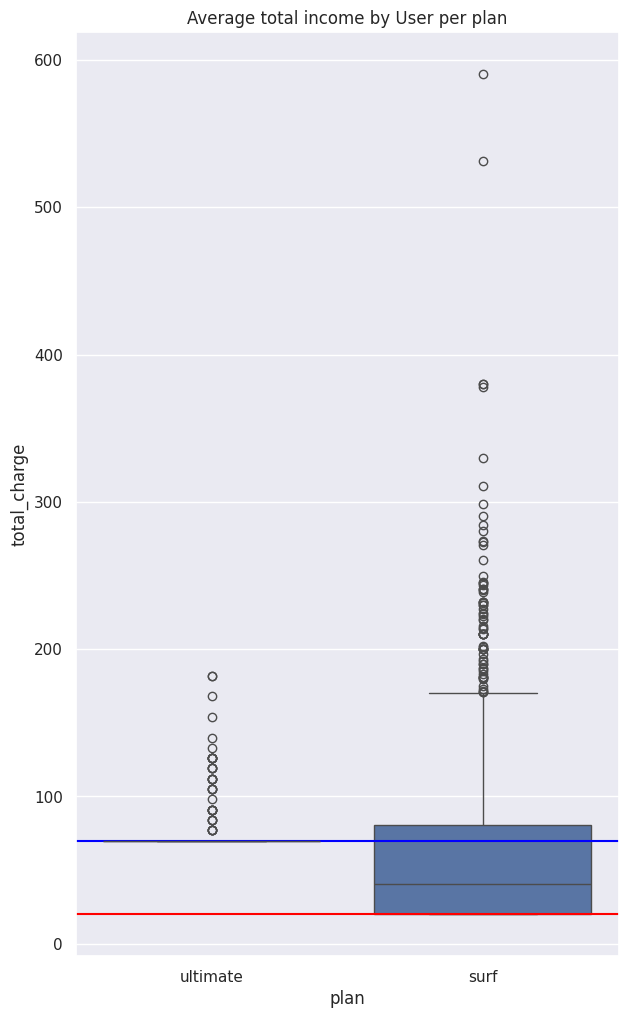

In [88]:
# Boxplot untuk membanding kan rata2 income by user by plan

#define figure size
sns.set(rc={"figure.figsize":(7, 12)})

graph = sns.boxplot(x = 'plan', y = 'total_charge', data = df_main_full)

#Drawing a horizontal line at point 20 & 70
graph.axhline(20, color='red')
graph.axhline(70, color='blue')
#The plot is shown
plt.title('Average total income by User per plan')
plt.show()

In [89]:
avg_ultimate['ultimate'].describe()

count    157.000000
mean      71.823284
std        7.424766
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      121.333333
Name: ultimate, dtype: float64

In [90]:
avg_surf['surf'].describe()

count    333.000000
mean      58.194344
std       43.565028
min       20.000000
25%       28.000000
50%       47.180000
75%       72.151111
max      320.185000
Name: surf, dtype: float64

In [91]:
# data count untuk setiap plan
user_plan_count = df_main_full['plan'].value_counts()
user_plan_count

plan
surf        1573
ultimate     720
Name: count, dtype: int64

In [92]:
# Bandingkan  Total income by type service by plan

avg_charge_type = pd.pivot_table(df_main_full, index=['month'], columns='plan', values=['call_charge', 'internet_charge', 'message_charge', 'usd_monthly_pay', 'total_charge', ], aggfunc='mean').reset_index()
avg_charge_type

month call_charge          internet_charge           message_charge  \
plan                 surf ultimate            surf  ultimate           surf   
0     2018-01    0.000000      0.0        0.000000  0.000000       0.000000   
1     2018-02    1.036667      0.0       13.333333  0.000000       0.026667   
2     2018-03    0.706957      0.0       25.217391  4.666667       0.016957   
3     2018-04    1.058400      0.0       19.600000  3.000000       0.052200   
4     2018-05    1.658571      0.0       25.844156  0.724138       0.125455   
5     2018-06    1.601134      0.0       27.525773  1.638298       0.149381   
6     2018-07    2.198182      0.0       40.330579  1.898305       0.145289   
7     2018-08    1.652222      0.0       42.098765  2.859155       0.180185   
8     2018-09    1.435979      0.0       36.649485  2.034884       0.186031   
9     2018-10    1.794304      0.0       43.375527  2.311321       0.251392   
10    2018-11    1.751131      0.0       36.042403  1.708661       0.210742   
11    2018-12    2.533585      0.0       47.704403  3.291391       0.319057   

              total_charge            usd_monthly_pay           
plan ultimate         surf   ultimate            surf ultimate  
0         0.0    20.000000  70.000000              20       70  
1         0.0    34.396667  70.000000              20       70  
2         0.0    45.941304  74.666667              20       70  
3         0.0    40.710600  73.000000              20       70  
4         0.0    47.628182  70.724138              20       70  
5         0.0    49.276289  71.638298              20       70  
6         0.0    62.674050  71.898305              20       70  
7         0.0    63.931173  72.859155              20       70  
8         0.0    58.271495  72.034884              20       70  
9         0.0    65.421224  72.311321              20       70  
10        0.0    58.004276  71.708661              20       70  
11        0.0    70.557044  73.291391              20       70

"Surf" Average income per users(58,19)
"Ultimate" Average income per users(71)
Median income per users for "Surf"(47,18) and "Ultimate"(70)

Interesting pomts:

*   Ultimate Customer almost not paying any extra charges expect for internet over limit charges. This is related to customer behaviour for internet usage. "Call" and "Messages" usage as previously mentioned still under the packages limit.
*  Surf Customer has some extra charges over limit especillay for Internet over limit and  also some for "call", "messages".



*   if we chack "boxplot" average income from ultimate customers around USD 70 which the cost of the package itself. While average income from Surf package have quite large "standard deviation" 43,56
*   Lot of "Outlier" for surf customer average income , but for ultimate not many outlier.



## Correlation between income vs other variable by plan

In [93]:
# Corelation between all numerical data in packages surf
surf_internet = df_main_full.loc[df_main_full['plan']=='surf', ['total_charge', 'gb_used', 'duration', 'sms']]

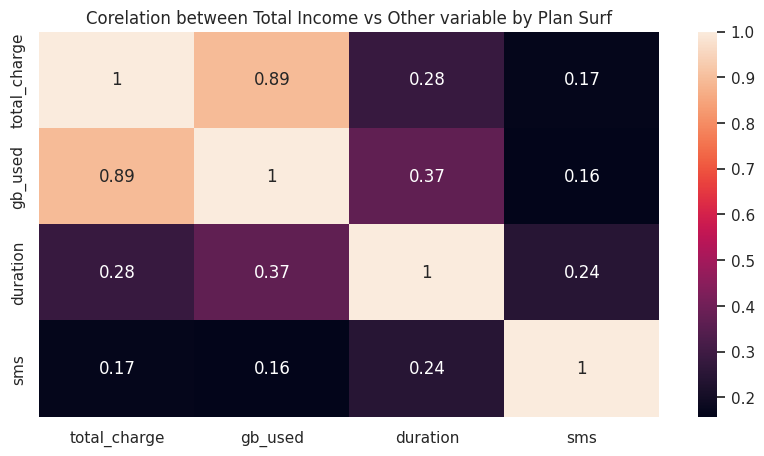

In [94]:
plt.figure(figsize=(10,5))
plt.title('Corelation between Total Income vs Other variable by Plan Surf')
sns.heatmap(surf_internet.corr(), annot=True)
plt.show()

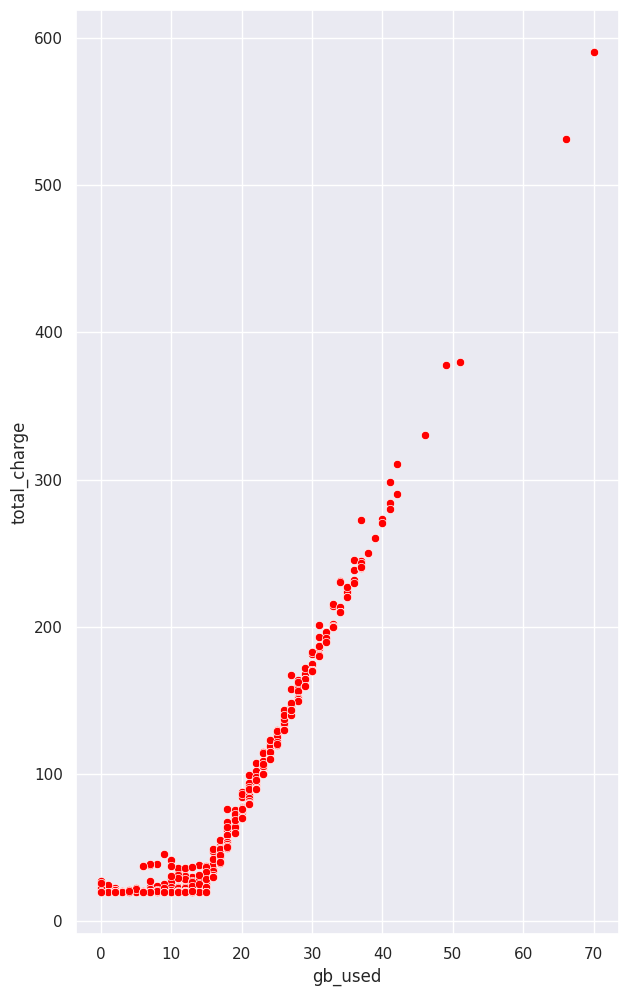

<Figure size 800x500 with 0 Axes>

In [95]:
# scatterplot corelation gb_used internet vs total income
sns.scatterplot(x='gb_used', y='total_charge', data=surf_internet, color='red')
plt.figure(figsize=(8, 5))
plt.show()

In [96]:
# Corelation between numerical data in ultimate package
ultimate_internet = df_main_full.loc[df_main_full['plan']=='ultimate', ['total_charge', 'gb_used', 'duration', 'sms']]

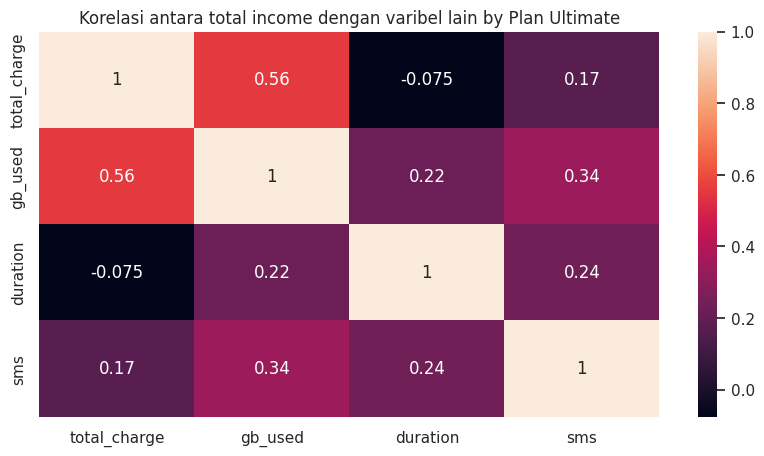

In [97]:
plt.figure(figsize=(10,5))
plt.title('Korelasi antara total income dengan varibel lain by Plan Ultimate')
sns.heatmap(ultimate_internet.corr(), annot=True)
plt.show()

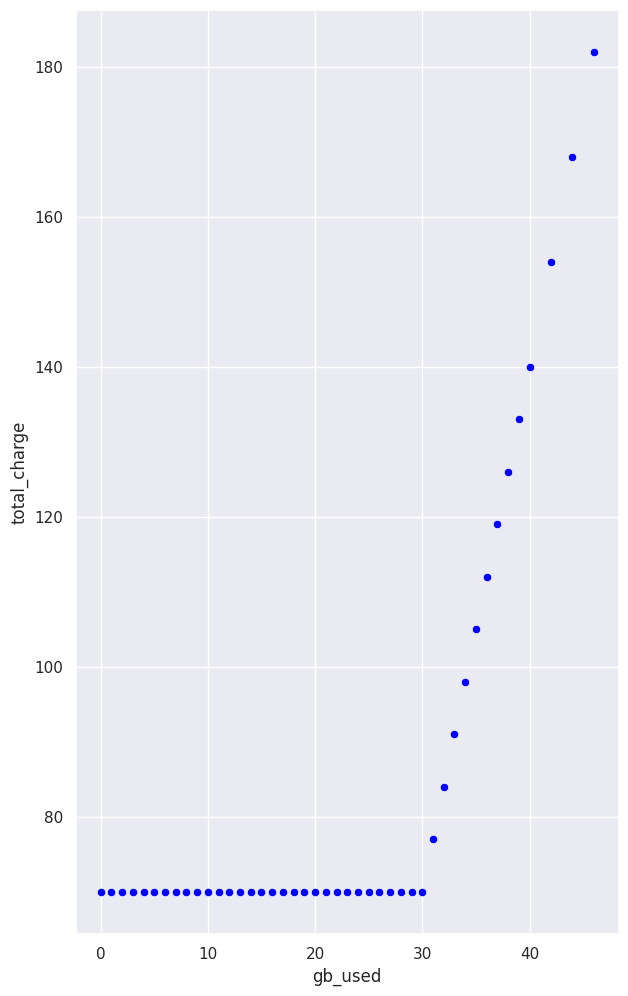

<Figure size 800x500 with 0 Axes>

In [98]:
# scatterplot untuk korelasi gb_used for internet vs total income
sns.scatterplot(x='gb_used', y='total_charge', data=ultimate_internet, color='blue')
plt.figure(figsize=(8, 5))
plt.show()

in Corelation table between average income per users per package, there is correlation between internet usage(gb_used) with average income per users. For "Surf" the corelation is strong (0,89) while for "Ultimate" there is mid corelation (0,56).

in scatterplot it clearly shown there is direct relation between increasing internet usage after reach package limitation, will impact average income per user.

Surf customer : after pass the 15GB limit the average income increase significantly.
Ultimate Customer: after pass 30Gb limit the average income increase significantly

It again proff the aveage income per user very related to user internet usage.
while other service such as "Call" and "message" not very significantly impact the average income.


## Average Income NY-NJ Area

In [99]:
# Average income from users in NY-NJ area

#avg_surf = avg_user.loc[:, ['user_id', 'surf']].dropna()
df_main_NYNJ = df_main_full.loc[df_main_full['is_nyn'] ==  1]
df_main_NYNJ.sample(5)
avg_income_NYNJ = pd.pivot_table(df_main_full, index=['month'], columns='is_nyn', values='total_charge', aggfunc='mean').reset_index()
avg_income_NYNJ

is_nyn,month,0,1
0,2018-01,53.333333,NaN
1,2018-02,50.683571,45.000000
2,2018-03,58.821034,41.140000
3,2018-04,52.506316,41.119286
4,2018-05,55.170455,47.965000
5,2018-06,58.808908,45.941600
6,2018-07,68.380136,53.747879
7,2018-08,68.487865,58.053171
8,2018-09,62.979528,60.115745
9,2018-10,67.266034,69.107170


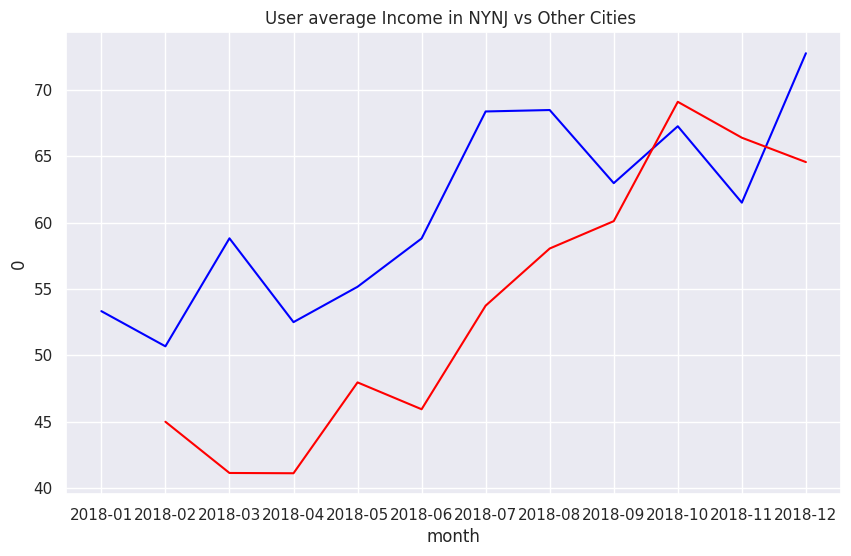

In [100]:
# histogram avg_income monthly by is_nyn (NY vs other city)
avg_income_NYNJ['month'] = avg_income_NYNJ['month'].astype(str)
plt.figure(figsize=(10,6))
plt.title('User average Income in NYNJ vs Other Cities ')

sns.lineplot(data=avg_income_NYNJ, x='month', y= 0, color='blue')
sns.lineplot(data=avg_income_NYNJ, x='month', y= 1, color='red')
plt.show()

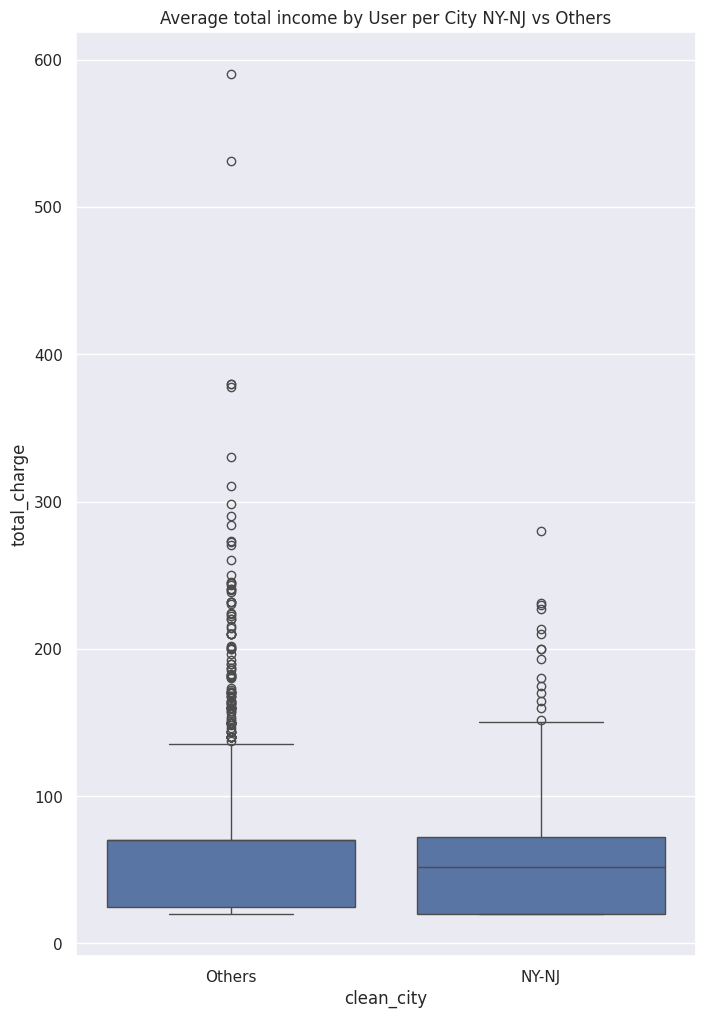

In [101]:
# Boxplot comparing average income per user per area NY-NJ vs others city

#define figure size
sns.set(rc={"figure.figsize":(8, 12)})

graph = sns.boxplot(x = 'clean_city', y = 'total_charge', data = df_main_full)

#The plot is shown
plt.title('Average total income by User per City NY-NJ vs Others')
plt.show()

Average income per user per city for NY-NJ vs Others
Average income for NY-NJ = 53,93
Average income for other cities = 60,9
Median for NY-NJ = 53,74
Median for other cities = 60,16

Other City avearge income per user and median slightly higher than NY-NJ

There are outlier especially for other cities


# **Hypothesis test : Average income Surf vs Ultimate**

Hypothesis Test Average income package "Ultimate" vs "Surf"

Statistic Test two samples t-test independent

*   Hyphotesis H0: Average income from user package "Ultimate" and "Surf" same
*   Hypothesis H1: Average income from user package "ultimate" and "Surf" is different

Alpha 5%



In [102]:
avg_income_surf = df_main_full[(df_main_full['plan'] == 'surf')].pivot_table(index=['month'],
                                                                             columns='plan',
                                                                             values= 'total_charge',
                                                                             aggfunc='mean' ).reset_index()


avg_income_surf

plan,month,surf
0,2018-01,20.000000
1,2018-02,34.396667
2,2018-03,45.941304
3,2018-04,40.710600
4,2018-05,47.628182
5,2018-06,49.276289
6,2018-07,62.674050
7,2018-08,63.931173
8,2018-09,58.271495
9,2018-10,65.421224


In [103]:
avg_income_ultimate = df_main_full[(df_main_full['plan'] == 'ultimate')].pivot_table(index=['month'],
                                                                             columns='plan',
                                                                             values= 'total_charge',
                                                                             aggfunc='mean' ).reset_index()


avg_income_ultimate

plan,month,ultimate
0,2018-01,70.000000
1,2018-02,70.000000
2,2018-03,74.666667
3,2018-04,73.000000
4,2018-05,70.724138
5,2018-06,71.638298
6,2018-07,71.898305
7,2018-08,72.859155
8,2018-09,72.034884
9,2018-10,72.311321


In [104]:
# Uji Hipotesis rata2 pendapatan per pelanggan per plan
from scipy import stats as st

results = st.ttest_ind(
          avg_income_surf['surf'],
          avg_income_ultimate['ultimate'],
            equal_var= True)
print('p-value: ', results.pvalue)

p-value:  7.83119144714108e-05


In [105]:
# Hyphotesis test: average income per users package "ultimate vs "Surf"
alpha= 0.05
if results.pvalue >= alpha:
    print('H0 Accepted : Average income from "Ultimate" and "Surf" users are same')
else:
    print('H1 Accepted : Average income from "Ultimate" and "Surf" users are different')

print('Average income from Surf package users', avg_income_surf['surf'].mean() )
print('Average income from Ultimate package users', avg_income_ultimate['ultimate'].mean() )

H1 Accepted : Average income from "Ultimate" and "Surf" users are different
Average income from Surf package users 51.40102516969467
Average income from Ultimate package users 72.01106825881764


# Hyphotesis Test: Average income from users in NY-NJ same as avearge income from other cities.

Statistic test with two samples t-test independent

Hipotests H0 : Rata-rata pendapatan dari penggunaan di wilayah NY-NJ sama

*   Hyphotesis H0 : Average income from users in NY-NJ area same as average income from other cities
*   Hyphotesis H1: Average income from users in NY-NJ area are diffrent from other cities

Alpha: 5%

In [106]:
avg_income_nynj = df_main_full[(df_main_full['is_nyn'] == 1)].pivot_table(index=['month'],
                                                                             columns='clean_city',
                                                                             values= 'total_charge',
                                                                             aggfunc='mean' ).reset_index()




avg_income_nynj

clean_city,month,NY-NJ
0,2018-02,45.000000
1,2018-03,41.140000
2,2018-04,41.119286
3,2018-05,47.965000
4,2018-06,45.941600
5,2018-07,53.747879
6,2018-08,58.053171
7,2018-09,60.115745
8,2018-10,69.107170
9,2018-11,66.402419


In [107]:
# Rata2 Pendapatan by User dari wilayah others

avg_income_others = df_main_full[(df_main_full['is_nyn'] == 0)].pivot_table(index=['month'],
                                                                             columns= 'clean_city',
                                                                             values= 'total_charge',
                                                                             aggfunc='mean' ).reset_index()


avg_income_others

clean_city,month,Others
0,2018-01,53.333333
1,2018-02,50.683571
2,2018-03,58.821034
3,2018-04,52.506316
4,2018-05,55.170455
5,2018-06,58.808908
6,2018-07,68.380136
7,2018-08,68.487865
8,2018-09,62.979528
9,2018-10,67.266034


In [108]:
from scipy import stats as st

results = st.ttest_ind(
          avg_income_nynj['NY-NJ'],
          avg_income_others['Others'],
            equal_var= True)
print('p-value: ', results.pvalue)

p-value:  0.07228255917727841


In [109]:
# Uji Hipotesis rata2 Pendapatan per pelanggan di wilayah NY-NJ  vs Others
alpha= 0.05
if results.pvalue >= alpha:
    print('Ho Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain SAMA')
else:
    print('H1 Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah Lain BERBEDA')

print('Rata-rata Pendapatan dari pengguna di wilayah NY-NJ', avg_income_nynj['NY-NJ'].mean() )
print('Rata-rata Pendapatan dari pengguna di Wilayah Lain(OTHERS)', avg_income_others['Others'].mean() )

Ho Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain SAMA
Rata-rata Pendapatan dari pengguna di wilayah NY-NJ 53.92345986859696
Rata-rata Pendapatan dari pengguna di Wilayah Lain(OTHERS) 60.89273395985024


In [110]:
# Uji Hipotesis rata2 Pendapatan per pelanggan di wilayah NY-NJ  vs Others
alpha= 0.05
if results.pvalue >= alpha:
    print('Ho Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain SAMA')
else:
    print('H1 Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah Lain BERBEDA')

print('Rata-rata Pendapatan dari pengguna di wilayah NY-NJ', avg_income_nynj['NY-NJ'].mean() )
print('Rata-rata Pendapatan dari pengguna di Wilayah Lain(OTHERS)', avg_income_others['Others'].mean() )

Ho Diterima : Rata-rata Pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain SAMA
Rata-rata Pendapatan dari pengguna di wilayah NY-NJ 53.92345986859696
Rata-rata Pendapatan dari pengguna di Wilayah Lain(OTHERS) 60.89273395985024


# **Conclusion**

 “Megaline” telecommunication company, who has 2(two) prepaid packages (“Surf” and “Ultimate”). The company want  to identify which prepaid package giving more income, thus the advertising company can create advertising budget properly.
They also asked for two hypothesis tests:
•	Average income of prepaid package “Surf” and “ultimate” are  same.
•	Average income of users in “NY-NJ” area different from Average income from other cities.
Megaline has prepared 500 users data as sample data together with internet data,  call data and message data which they sent in year 2018.
Sata consist of 5 datasets:
•	Users data (500 users)
•	Plan/Packages data (2 records)
•	 Calls data (137735 rows)
•	Messages/SMS data(76051 rows)
•	Internet data (104825 rows)
All datasets checked, repaired and combined so it ready to be analyzed.
Please find below prepare the data:
•	Check there is missing data or duplicate data
•	Check whether there is data type that need to change or data quality need to be improved.
•	Change data type: There are columns found contain “date” but put as “string/object” thus the data type needs to change to datetime.
•	Clean up and add data column:
o	Add new column ”clean_city”  for simplify city_name to make it easier to analyze
o	Add new column “month” which in month from transaction_date.  The “month” column will be used for monthly analysis.
o	Smoothed column in package data so if internet data limit in GB, dataset should be in GB not MB.
o	Rounding up transaction data(call_duration, internet_gb_used) so it follow megaline calculation rule.
o	Delete unnecessary data such as transaction with zeroes duration.
Data merge into one dataset so it easier to analyzed and calculate monthly total income for each user.
•	All data combined into one data set (2293 rows)
•	Data combined by aggregate data per user per month, as needed to calculate for each user.
•	Calculate total income per user per month
•	Data ready to analyze


User behavior analysis base on provided sample data :
•	Monthly user average (mean) call for the two packages is almost same (Surf (412,17), Ultimate (413,83)
•	Monthly user average (mean) message for package “Ultimate” is slightly higher(31,09) from package “surf”(24,66).
•	Monthly user average (mean) internet usage for package “surf” is 14,59 while for package “Ultimate” 16,35.  While the median for “surf” (16,35) , for “Ultimate” (17.06).
•	There are many outliers for internet usage especially for package “surf” with maximum usage 70 GB
•	Call usage and message usage are far below package maximum limit for package “Ultimate” and slightly above maximum limit of package “surf”.
•	There are many internet usage above maximum limit for both packages, especially “surf” package.
User monthly average income:
•	User monthly average income for package surf(58,19) and Ultimate(71)
•	Ultimate package user do not pays extra charges for call and messages as the usage still below packages limit. Except for internet usage where it is found some extra usage above maximum limit.
•	Surf package user still pay extra charges for all three services (call, messages, internet).
•	Graph of monthly user average income for package “ultimate” flat around 70 (basic price for Ultimate), while graph for monthly user average income for package “surf” show uphill chart although average still below ultimate.

Monthly user average income for user in “NY-NJ” areas
•	Average income per user for “NY-NJ” area slightly different from average income per user for other cities.
•	Mean for “NY-NJ” = 53,74 while other cities = 60,9
Correlation average income per user with several numerical factors:
•	Identify there are correlation between monthly user average income with internet usage in both package Surf and Ultimate.
•	Correlation monthly user average income for package surf vs Internet usage is strong (0,89)
•	Correlation monthly user average income for package Ultimate vs Internet usage is medium (0,56). There is significant income increase after internet usage reach maximum limit of the package.
Hypothesis Test:
There are two Hypothesis test done:
1.	Average income for package Ultima and Surf are same
•	Test using 2 samples with alpha = 5%
•	Test Result: H1 User Average income for package Ultima and Surf are different: “Accepted”
•	 Average income for package “Surf” : 51,401025
•	Average income for package “Ultima” : 72,011068

2.	Average income for user in “NY-NJ” area same with average income for user in other cities.
•	Test using 2 sample with alpha = 5%
•	Test Result: H0 User Average income for “NY-NJ” areas and “Others” cities are same: “Accepted”
•	 Average income for “NY-NJ”” : 53,92345
•	Average income for “Others Cities” : 60,89273
